<a href="https://colab.research.google.com/github/Pruthvik-Reddy/ASM-SEM-6/blob/master/asm_exp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn 
import matplotlib.pyplot as plt
seaborn.set_style('whitegrid')

Text(0, 0.5, 'Frequency')

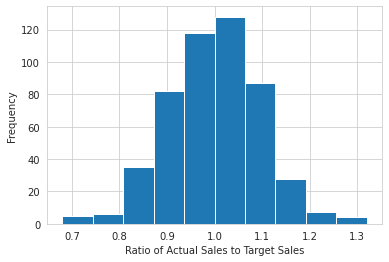

In [50]:
std_dev = .1
num_reps = 500
num_simulations = 2000
avg=1
ratio_actual_to_target= np.random.normal(avg, std_dev, num_reps).round(2)
plt.hist(ratio_actual_to_target,bins=10)
plt.xlabel('Ratio of Actual Sales to Target Sales')
plt.ylabel('Frequency')
#seaborn.distplot(pct_to_target)

Text(0, 0.5, 'Frequency')

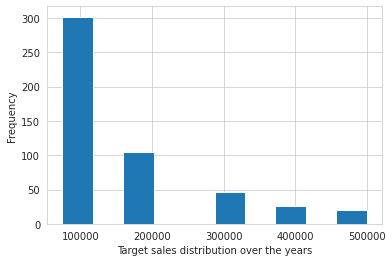

In [51]:
sales_target_values = [75_000, 100_000, 200_000, 300_000, 400_000, 500_000]
sales_target_prob = [.3, .3, .2, .1, .05, .05]
sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
#seaborn.distplot(sales_target,bins=4)
plt.hist(sales_target,bins=10)
plt.xlabel('Target sales distribution over the years')
plt.ylabel('Frequency')


In [52]:
df = pd.DataFrame(index=range(num_reps), data={'ratio_actual_to_target': ratio_actual_to_target,'Sales_Target': sales_target})
df['Actual_Sales'] = df['ratio_actual_to_target'] * df['Sales_Target']
def calc_commission_rate(x):
  if x <= .90:
        return .02
  if x <= .99:
        return .03
  else:
        return .04

df['Commission_Rate'] = df['ratio_actual_to_target'].apply(calc_commission_rate)
df['Commission_Amount'] = df['Commission_Rate'] * df['Actual_Sales']
df.head()


,ratio_actual_to_target,Sales_Target,Actual_Sales,Commission_Rate,Commission_Amount
0,0.94,100000,94000.0,0.03,2820.0
1,0.79,400000,316000.0,0.02,6320.0
2,0.97,200000,194000.0,0.03,5820.0
3,0.98,200000,196000.0,0.03,5880.0
4,0.90,100000,90000.0,0.02,1800.0


In [0]:
all_stats = []

# Loop through many simulations
for i in range(num_simulations):

    # Choose random inputs for the sales targets and percent to target
    sales_target = np.random.choice(sales_target_values, num_reps, p=sales_target_prob)
    ratio_actual_to_target = np.random.normal(avg, std_dev, num_reps).round(2)

    # Build the dataframe based on the inputs and number of reps
    df = pd.DataFrame(index=range(num_reps), data={'ratio_actual_to_target': ratio_actual_to_target,
                                                   'Sales_Target': sales_target})

    # Back into the sales number using the percent to target rate
    df['Actual_Sales'] = df['ratio_actual_to_target'] * df['Sales_Target']

    # Determine the commissions rate and calculate it
    df['Commission_Rate'] = df['ratio_actual_to_target'].apply(calc_commission_rate)
    df['Commission_Amount'] = df['Commission_Rate'] * df['Actual_Sales']

    # We want to track sales,commission amounts and sales targets over all the simulations
    all_stats.append([df['Actual_Sales'].sum().round(0),
                      df['Commission_Amount'].sum().round(0),
                      df['Sales_Target'].sum().round(0)])
    

In [54]:
results_df = pd.DataFrame.from_records(all_stats, columns=['Actual_Sales','Commission_Amount',
                                                           'Sales_Target'])
results_df.describe().style.format('{:,}')


,Actual_Sales,Commission_Amount,Sales_Target
count,"2,000.0","2,000.0","2,000.0"
mean,"83,885,941.5","2,864,262.5565","83,888,000.0"
std,"2,679,801.974309539","101,909.40312982885","2,643,945.4369817977"
min,"76,384,500.0","2,573,575.0","76,475,000.0"
25%,"82,144,875.0","2,796,133.0","82,175,000.0"
50%,"83,862,000.0","2,864,536.5","83,825,000.0"
75%,"85,626,562.5","2,930,978.0","85,650,000.0"
max,"91,804,250.0","3,177,088.0","91,600,000.0"


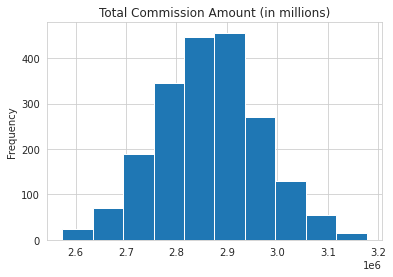

In [55]:
results_df['Commission_Amount'].plot(kind='hist', title="Total Commission Amount (in millions)")

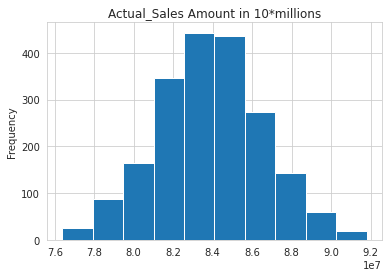

In [58]:
results_df['Actual_Sales'].plot(kind='hist',title='Actual_Sales Amount in 10*millions')